# HW 4

In [1]:
from pylab import *
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
import numba
from numba import jit

In [2]:
@jit() 
def HenonMap(x,y,a,b,alpha,beta):
    return a- alpha*x**2+b*y, beta*x

In [3]:
@jit()
def func1():
    # Map dependent parameters
    a = 1.4
    b = 0.3
    alpha=1
    beta=1

    iterates = 1000
    # Initial Condition
    xtemp = 0.1
    ytemp = 0.1

    x = [xtemp]
    y = [ytemp]

    for n in range(0,iterates):
        xtemp, ytemp = HenonMap(xtemp,ytemp,a,b,alpha,beta)
        x.append( xtemp )
        y.append( ytemp )

# Plot the time series
    plt.plot(x,y,'k.')
    plt.savefig("Solucion.png",dpi=300)
    show()
func1()

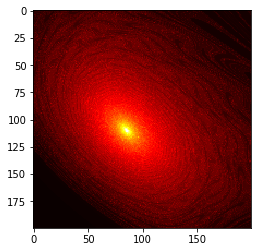

In [12]:
@jit()
def func2():
    a = 1
    b = 1
    alpha=0.2
    beta=1.01
    R=100
    npoints=200
    pgrid=np.linspace(0,4,npoints)
    qgrid=np.linspace(-4,0,npoints)[:, np.newaxis]
    values=np.zeros([npoints,npoints])
    for i in range(npoints):
        for j in range(npoints):
            xtemp = pgrid[i]
            ytemp = qgrid[j]
            aux=0
            while (xtemp**2+ytemp**2)<R:
                xtemp, ytemp = HenonMap(xtemp,ytemp,a,b,alpha,beta)
                if aux>1000:
                    break
                aux+=1
            values[i,j]=aux
    plt.imshow(values, interpolation='nearest', cmap=cm.hot)
    plt.savefig("HenonMap.png",dpi=300)
    show()  
func2()